## Plot unspecific TRSL timecourses

In [1]:
import cPickle as pkl
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)
%matplotlib inline
matplotlib.style.use('ggplot')

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1407: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
import sys
sys.path.append(r'/home/martin/git/TRSL/translation/')

In [3]:
import MRNA

In [4]:
run = r'/home/martin/git/TRSL/results/TRSL_unspecific_low_ribosomes_results_60_transcripts_20170824_1254_20_ribosomes_0300s.p'

In [5]:
results = pkl.load(open(run))

In [6]:
results.keys()

['n_tRNA',
 'description',
 'n_ribosomes',
 'timerange',
 'proteome',
 'transcriptome',
 'peptide_bonds',
 'duration',
 'time_stamp',
 'timecourses']

In [7]:
peptide_bonds = results['timecourses']['peptide_bonds']
ribos_bound = results['timecourses']['ribos._bound']
proteins = results['timecourses']['proteins']
tRNA_bound = results['timecourses']['tRNA_bound']
tRNA_free = results['timecourses']['tRNA_free']

In [8]:
times = np.linspace(0, 300, len(peptide_bonds))

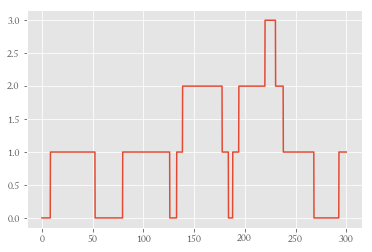

In [9]:
plt.plot(times, ribos_bound)

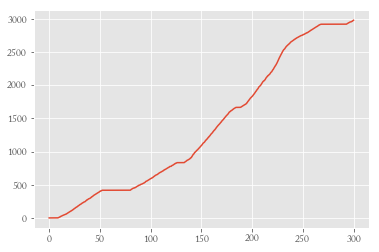

In [10]:
ax1 = plt.subplot(111)
ax1.plot(times, peptide_bonds)
#ax1.set_xlim([0, 10])
#ax1.set_ylim([0, 100])

In [20]:
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

In [21]:
x = times
y = ribos_bound
z = peptide_bonds

Times where ribosomes bind or detach:

In [22]:
jump_times = [times[i] for i, ribos in enumerate(ribos_bound[:-1]) if ribos_bound[i]!=ribos_bound[i+1]]
jump_times

[8.2054703135423619,
 52.234823215476986,
 79.452968645763846,
 125.88392261507671,
 132.68845897264842,
 138.49232821881253,
 177.51834556370912,
 183.72248165443628,
 187.92528352234822,
 193.92928619079385,
 219.74649766511007,
 230.15343562374915,
 237.75850567044697,
 267.97865243495664,
 292.59506337558372]

Modified from https://matplotlib.org/examples/pylab_examples/subplots_demo.html:

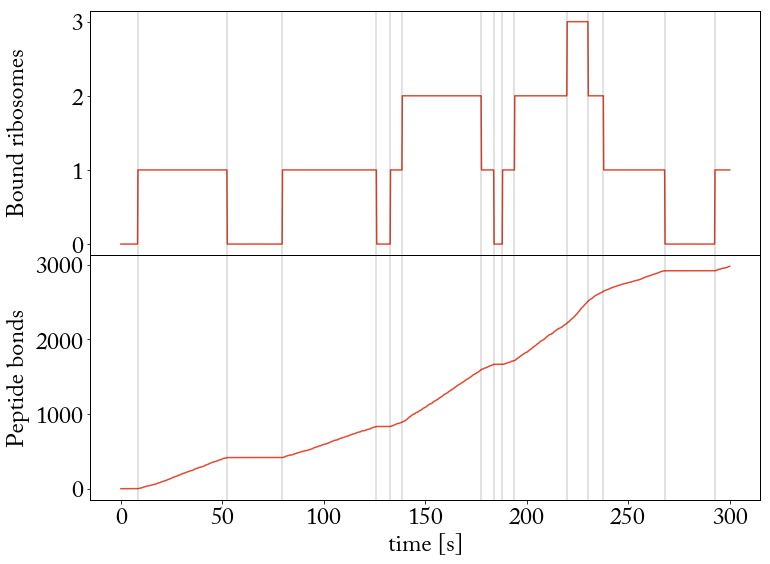

In [23]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

myfontsize = 24
ax1.tick_params(axis='both', which='major', labelsize=myfontsize)
ax2.tick_params(axis='both', which='major', labelsize=myfontsize)

ax2.set_xlabel("time [s]", fontsize=myfontsize)
ax1.set_ylabel("Bound ribosomes", fontsize=myfontsize)
ax2.set_ylabel("Peptide bonds", fontsize=myfontsize)

ax1.get_yaxis().set_label_coords(-0.09, 0.5)
ax2.get_yaxis().set_label_coords(-0.09, 0.5)

ax1.plot(x, y)
#ax1.set_title('Sharing both axes')
ax2.plot(x, z)
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False);

ax1.grid(b=False)
ax2.grid(b=False)

ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')
ax1.xaxis.label.set_color('black')
ax1.yaxis.label.set_color('black')

ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', colors='black')
ax2.xaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')

# vertical lines to indicate changes:
for time in jump_times:
    ax1.axvline(x=time, color='k', alpha=0.15)
    ax2.axvline(x=time, color='k', alpha=0.15)
    #ax2.plot((time, 0), (time, 3000), 'k-')
    
plt.savefig('TRSL_unspecific_bound_ribos_peptide_bonds.pgf', bbox_inches='tight')